# Outline

### 1. Data Gathering
       1.1. Importing Necessary Library
       1.2. Loading the Manually Downloaded data
       1.3. Programmatic Download of Dataset using the request Method
       1.4. Scrapping using the tweepy API

### 2. Accessing Data
       2.1. Quality Issues
       2.2. Tidiness

### 3. Cleaning Data
       3.1. Define Issue
       3.2. Code
       3.3. Test

### 4. Data Storage
       4.1. Merging the three dataframes
       4.2. Storing the master dataframe in .csv format

### 5. Analysis & Visualization


### Further Analysis

# 1. Data Gathering

### 1.1 Import of Necessary Libraries

In [1]:
import pandas as pd
import requests
#import tweepy
from bs4 import BeautifulSoup
import os
import json

### 1.2. Loading the Manually Downloaded data 

In [2]:
# Loading the Dataset manually downloaded
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### 1.3. Programmatic Download of Dataset using the request Method

In [ ]:
# Programmatically downloading data 

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

# Creating a folder for it
folder_name = 'image_predcitions'

if not os.path.exists(folder_name):
  os.makedirs(folder_name)

with open(os.path.join((folder_name), url.split('/')[-1]), mode='wb') as file:
  file.write(r.content)
  os.listdir(folder_name)

In [3]:
# Loading the downloaded .tsv files
Image_Predcitions = pd.read_csv('image_predcitions/image-predictions.tsv', sep="\t")
Image_Predcitions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### 1.4. Scrapping using the tweepy API

In [5]:
# Use of tweepy API for the download of the dataset
# I haven got access to the project environment, so I decided to follow the other route of using the .txt files

# First, I download the tweet_json.txt file
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)

# Creating a folder for it
folder_name = 'tweet_json'
# check if folder exist
if not os.path.exists(folder_name):
  os.makedirs(folder_name)
# Write the contents into the folder
with open(os.path.join((folder_name), url.split('/')[-1]), mode='wb') as file:
  file.write(response.content)
  os.listdir(folder_name)

In [4]:
# Reading the content line by line
# define an empty list
df_list = []
 
# Open text file for reading
with open('tweet_json/tweet-json.txt', 'r') as json_file:
  for line in json_file.readlines():
    # Read easch JSON string status into a dictionary
    each_tweet_line = json.loads(line)
    # Getting required parameter
    tweet_id = each_tweet_line['id']
    retweet_count = each_tweet_line['retweet_count']
    fav_count = each_tweet_line['favorite_count']
    follows_count = each_tweet_line['user']['followers_count']
    frnds_count = each_tweet_line['user']['friends_count']

    df_list.append({'tweet_id': tweet_id,
                    'retweet_count': retweet_count,
                    'favorite_count': fav_count,
                    'followers_count': follows_count, 
                    'friends_count': frnds_count})
    
tweet_json = pd.DataFrame(df_list)

In [5]:
tweet_json.head()

,favorite_count,followers_count,friends_count,retweet_count,tweet_id
0,39467,3200889,104,8853,892420643555336193
1,33819,3200889,104,6514,892177421306343426
2,25461,3200889,104,4328,891815181378084864
3,42908,3200889,104,8964,891689557279858688
4,41048,3200889,104,9774,891327558926688256


In [6]:
# Since the dataset columns aren't ordered, I decided to order it using the codes below 
lst = list(tweet_json.columns)
lst.reverse()
lst
# reversing the column
tweet_json = tweet_json.T.reindex(lst).T
tweet_json.head()

,tweet_id,retweet_count,friends_count,followers_count,favorite_count
0,892420643555336193,8853,104,3200889,39467
1,892177421306343426,6514,104,3200889,33819
2,891815181378084864,4328,104,3200889,25461
3,891689557279858688,8964,104,3200889,42908
4,891327558926688256,9774,104,3200889,41048


The Data gathering is done, moving forward to accesing the datasets

# 2. Accessing Data

Accessing Data could be done visually or programmatically.

In [7]:
# Let's load the dataset closely

#1. The twitter_archive_enhanced data
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [8]:
twitter_archive_enhanced['expanded_urls'].nunique()

2218

In [9]:
twitter_archive_enhanced['source'].nunique()

4

In [10]:
# Checking the overall information about the dataset
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
# Checking for missing values
twitter_archive_enhanced.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

There are missing values in the following columns of the twitter_archive_enhanced dataset;
* in_reply_to_status_id
* in_reply_to_user_id
* retweeted_status_id
* retweeted_status_user_id
* retweeted_status_timestamp
* expanded_urls


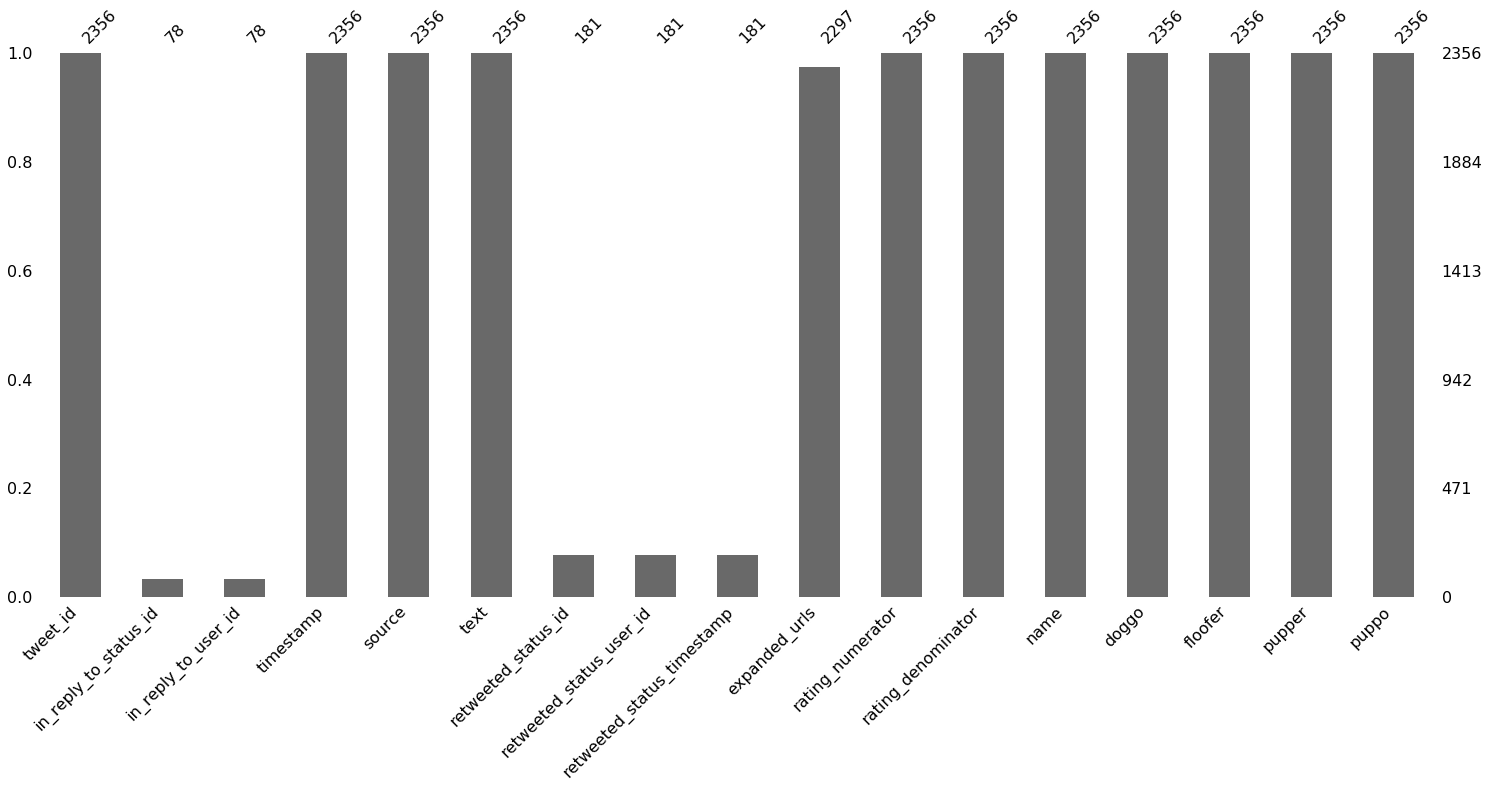

In [13]:
# Checking for missing values
import missingno as msno

msno.bar(twitter_archive_enhanced);

The plot above was to confirm the presence of this missing values

In [14]:
# Checking for duplicate data in the twitter_archive_enhanced
twitter_archive_enhanced.duplicated().sum()

0

* There is no duplicate in the twitter_archive_enhanced dataset

In [15]:
# Checking for irregularity in the dataset
twitter_archive_enhanced.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [16]:
twitter_archive_enhanced['source'].unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

* The twitter_archive_enhanced['source'] has some additional characters which are not relevant. The addition of '<a href=' before and  'rel="nofollow">' after.

In [17]:
twitter_archive_enhanced['timestamp'].values

array(['2017-08-01 16:23:56 +0000', '2017-08-01 00:17:27 +0000',
       '2017-07-31 00:18:03 +0000', ..., '2015-11-15 23:21:54 +0000',
       '2015-11-15 23:05:30 +0000', '2015-11-15 22:32:08 +0000'],
      dtype=object)

* The Presence of +0000 is not neccessary in twitter_archive_enhanced['timestamp'] column
* Time and Date together is not neat enough


In [18]:
rating_numerator_less10 = twitter_archive_enhanced[twitter_archive_enhanced['rating_numerator'] < 10]
rating_numerator_less10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 45 to 2355
Data columns (total 17 columns):
tweet_id                      440 non-null int64
in_reply_to_status_id         12 non-null float64
in_reply_to_user_id           12 non-null float64
timestamp                     440 non-null object
source                        440 non-null object
text                          440 non-null object
retweeted_status_id           9 non-null float64
retweeted_status_user_id      9 non-null float64
retweeted_status_timestamp    9 non-null object
expanded_urls                 430 non-null object
rating_numerator              440 non-null int64
rating_denominator            440 non-null int64
name                          440 non-null object
doggo                         440 non-null object
floofer                       440 non-null object
pupper                        440 non-null object
puppo                         440 non-null object
dtypes: float64(4), int64(3), object(10)
memory us

* 440 entries of the rating_numerator is less than 10, this indicates bad breed.

In [19]:
# checking the name column
twitter_archive_enhanced[twitter_archive_enhanced['name'] == 'None']['name'].count()

745

In [20]:
twitter_archive_enhanced['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

* There are about 745 entries with twitter_archive_enhanced['name'] == 'None'. It obvious there was no entry here.
* Other entries that are not correct include: ['by','the','all','his','a','such','not','one','just','an']. Reason why these are not suppose to be in the name column is that there all start with small letters which is against the normal format for writing names

In [21]:
# Definning a function value count function
def check_None(df, col):
    return df[df[col] == 'None'][col].count()

lst = ['doggo', 'floofer', 'pupper', 'puppo']
for co in lst:
    print(co, 'count is:', check_None(twitter_archive_enhanced, co))

doggo count is: 2259
floofer count is: 2346
pupper count is: 2099
puppo count is: 2326


* The ['doggo', 'floofer', 'pupper', 'puppo'] has several None entries

In [22]:
#2. The Image_Predcitions data
Image_Predcitions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [23]:
Image_Predcitions['jpg_url'].nunique()

2009

In [24]:
2075-2009

66

In [25]:
Image_Predcitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
Image_Predcitions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [27]:
Image_Predcitions.duplicated().sum()

0

#### Image Prediction Dataset
* Does not have any missing value
* Does not have duplicates

In [28]:
#3. The tweet_json file
tweet_json

,tweet_id,retweet_count,friends_count,followers_count,favorite_count
0,892420643555336193,8853,104,3200889,39467
1,892177421306343426,6514,104,3200889,33819
2,891815181378084864,4328,104,3200889,25461
3,891689557279858688,8964,104,3200889,42908
4,891327558926688256,9774,104,3200889,41048
5,891087950875897856,3261,104,3200889,20562
6,890971913173991426,2158,104,3200889,12041
7,890729181411237888,16716,104,3200889,56848
8,890609185150312448,4429,104,3200889,28226
9,890240255349198849,7711,104,3200889,32467


In [29]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
tweet_id           2354 non-null int64
retweet_count      2354 non-null int64
friends_count      2354 non-null int64
followers_count    2354 non-null int64
favorite_count     2354 non-null int64
dtypes: int64(5)
memory usage: 92.0 KB


In [30]:
tweet_json.isna().sum()

tweet_id           0
retweet_count      0
friends_count      0
followers_count    0
favorite_count     0
dtype: int64

In [31]:
# Checking for unique values in friends_count
tweet_json['friends_count'].nunique()

1

* The column friends_count is not relevant. It has just one observation

* Fellowers count will not have enough impact during analysis

In [32]:
tweet_json.duplicated().sum()

0

#### tweet_json data
* Does not have any missing value
* Does not have duplicates

### 2.1 Quality Issues

1. Irrelevant character
    * The twitter_archive_enhanced['source'] has some additional characters which are not relevant. The addition of '<a href=' before and  'rel="nofollow">' after.
    
2. Unnecessary character
    * The Presence of : & +0000 is not neccessary in twitter_archive_enhanced['timestamp'] column
3. Columns with wrong datatype
    * tweet_id being int instead of objects
    * rating_numerator and rating_denominator being int, instead of floats
    * retweet_count and favorite_count should be integers, not floats
4. Merged Date and Time (in the timestamp column)
    * Time and Date together is not neat enough
5. Null Entries (in column 'name')
    * There are about 745 entries with twitter_archive_enhanced['name'] == 'None'. It obvious there was no entry here.
6. Unaccepted entries (in column 'name') 
    * Entries with lower cases in the name columns are not accepted. Reason why these are not suppose to be in the name column is that there all start with small letters which is against the normal format for writing names
7. Missing values (in the following columns:)
    * in_reply_to_status_id
    * in_reply_to_user_id
    * retweeted_status_id
    * retweeted_status_user_id
    * retweeted_status_timestamp
    * expanded_urls
8. Irrelevant Columns
    * friends_count (in table tweet_json.txt)

### 2.2. Tidiness 
1. Dog stages
    * The four different columns doggo, floofer, pupper and puppo to become a single column
2. Different Tables
    * The three datasets to be merged into a master dataframe

# 3. Cleaning Data 

#### Making a copy of original dataset

In [33]:
twitter_archive_enhanced_clean = twitter_archive_enhanced.copy() # Making a copy of the twitter_archive_enhanced dataset

Image_Predictions_clean = Image_Predcitions.copy() # Making a copy of the Image_Predcitions dataset

tweet_json_clean = tweet_json.copy() # Making a copy of the tweet_json dataset

### Issue 1. Irrelevant character
The twitter_archive_enhanced['source'] has some additional characters which are not relevant. The addition of '<a href=' before and 'rel="nofollow">' after.

### Define
Removal of '<a href=' before and 'rel="nofollow">' after from the source column of the twitter_archive_enhanced

### Code

In [34]:
twitter_archive_enhanced_clean['source'].head(1)[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [35]:
# Let's replace the irrelevant data in the twitter_archive_enhanced_clean['source'] column
twitter_archive_enhanced_clean['source'] = twitter_archive_enhanced_clean['source'].str.replace('<a href=', '')
twitter_archive_enhanced_clean['source'] = twitter_archive_enhanced_clean['source'].str.replace(' rel="nofollow">Twitter for iPhone</a>', '')

### Test

In [36]:
twitter_archive_enhanced_clean['source'].head()

0    "http://twitter.com/download/iphone"
1    "http://twitter.com/download/iphone"
2    "http://twitter.com/download/iphone"
3    "http://twitter.com/download/iphone"
4    "http://twitter.com/download/iphone"
Name: source, dtype: object

### Issue 2. Unnecessary character
* The Presence of +0000 is not neccessary in twitter_archive_enhanced['timestamp'] column
* The Presence of : is not neccessary in twitter_archive_enhanced['timestamp'] column

### Define
Removal of the +0000 & :  in the timestamp feature of the twitter_archive_enhanced column

### Code

In [37]:
# before cleaning
twitter_archive_enhanced_clean['timestamp'].head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

In [38]:
# using the .strip() method to clean the unnecessary character in the twitter_archive_enhanced_clean['timestamp'] column
timestamp_values = twitter_archive_enhanced_clean['timestamp'].values
timestamp_values_new = []

for i in range(0, len(timestamp_values)):
    timestamp_values_new.append(timestamp_values[i].strip(': +0000'))

In [39]:
# Replacing the affected values with the treated values
twitter_archive_enhanced_clean['timestamp'] = twitter_archive_enhanced_clean['timestamp'].replace(timestamp_values, timestamp_values_new)

### Test

In [40]:
': +0000' in twitter_archive_enhanced_clean['timestamp']

False

In [41]:
twitter_archive_enhanced_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"""http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"""http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


### 3. Columns with wrong datatype

* tweet_id being int instead of objects
* rating_numerator and rating_denominator being int, instead of floats
* retweet_count and favorite_count should be integers, not floats

### Define
Change of Datatype across the listed columns

### Code

In [42]:
#1. tweet_id being int instead of objects in the three dataframe
# First, let's define a function that will help solve the issue across the three dataframes
def int_to_str(df, col):
    df[col] = df[col].astype(str)
    
# Then let's pass in the three dataframes
int_to_str(twitter_archive_enhanced_clean, 'tweet_id')
int_to_str(Image_Predictions_clean, 'tweet_id')
int_to_str(tweet_json_clean, 'tweet_id')

In [43]:
#2. rating_numerator and rating_denominator should be floats
twitter_archive_enhanced_clean['rating_numerator'] = twitter_archive_enhanced_clean['rating_numerator'].astype(float)
twitter_archive_enhanced_clean['rating_denominator'] = twitter_archive_enhanced_clean['rating_denominator'].astype(float)

In [44]:
#3. retweet_count and favorite_count should be integers, not floats
tweet_json_clean[['retweet_count', 'favorite_count']] = tweet_json_clean[['retweet_count', 'favorite_count']].astype(int)

### Test

In [45]:
# Checking the datatypes for the columns in twitter_archive_enhanced_clean
twitter_archive_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null float64
rating_denominator            2356 non-null float64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(6), object(

In [46]:
# Checking the datatype for the columns in Image_Predictions_clean columns
Image_Predictions_clean['tweet_id'].dtype

dtype('O')

In [47]:
# Checking the datatype for the columns in Image_Predictions_clean columns
tweet_json_clean['tweet_id'].dtype

dtype('O')

### Issue 4. Merged Date and Time (in the timestamp column)

Time and Date together is not neat enough

### Define
Split the Time and Date into two different columns

### Code

In [48]:
twitter_archive_enhanced_clean['timestamp'].head()

0    2017-08-01 16:23:56
1    2017-08-01 00:17:27
2    2017-07-31 00:18:03
3    2017-07-30 15:58:51
4    2017-07-29 16:00:24
Name: timestamp, dtype: object

In [49]:
# Extracting the date from the timestamp
twitter_archive_enhanced_clean['Dates'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp']).dt.date 

# Extracting the time from the timestamp
twitter_archive_enhanced_clean['Time'] = pd.to_datetime(twitter_archive_enhanced_clean['timestamp']).dt.time

# dropping the timestamp from the twitter_archive_enhanced_clean DataFrame
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(columns=['timestamp'])

### Test

In [50]:
twitter_archive_enhanced_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dates,Time
0,892420643555336193,NaN,NaN,"""http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,NaN,NaN,"""http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,NaN,NaN,"""http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,None,None,None,None,2017-07-31,00:18:03


In [51]:
twitter_archive_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'Dates', 'Time'],
      dtype='object')

### Issue 5. Null Entries (in column 'name')

There are about 745 entries with twitter_archive_enhanced['name'] == 'None'. It obvious there was no entry here.


### Define 
The column name with entries as ['None']. These columns can be converted to np.nan, then filled using the forward and backward fill method

### Code

In [52]:
twitter_archive_enhanced_clean['name'].value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Lola          10
Penny         10
Winston        9
Bo             9
Sadie          8
the            8
Toby           7
an             7
Buddy          7
Daisy          7
Bailey         7
Scout          6
Koda           6
Jax            6
Stanley        6
Dave           6
Milo           6
Oscar          6
Rusty          6
Bella          6
Jack           6
Leo            6
Bentley        5
            ... 
Berkeley       1
Tonks          1
Bronte         1
Halo           1
Divine         1
Boston         1
Darby          1
Mabel          1
Beya           1
Stuart         1
Jarod          1
Millie         1
Kanu           1
Crawford       1
Caryl          1
Kathmandu      1
Tassy          1
Harvey         1
Clybe          1
Blue           1
Willow         1
Wafer          1
Winifred       1
Fiji           1
Dixie          1
Spanky         1
Raphael        1
Gòrdón        

In [53]:
# Let's import numpy to use the nan
import numpy as np

# converting all entries to nan values
twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean['name'].replace( [ 'None'], np.nan)

# Using the forward and backward fill method to fill the nan values
twitter_archive_enhanced_clean['name'] = twitter_archive_enhanced_clean['name'].ffill().bfill()

### Test

In [54]:
twitter_archive_enhanced_clean['name'].head(10)

0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
5    Franklin
6         Jax
7         Jax
8        Zoey
9      Cassie
Name: name, dtype: object

In [55]:
'None' in twitter_archive_enhanced_clean['name']

False

### Issue 6. Unaccepted entries (in column 'name')

Entries with lowercase are not accepted in the column name. Reason why these are not suppose to be in the name column is that there all start with small letters which is against the normal format for writing names 

### Define
The name column with lowercase entries are not accepted as names

### Code

In [56]:
# Let's have the value count of the lowercase entries in the column ('name')
mask = twitter_archive_enhanced_clean.name.str.contains('^[a-z]', regex = True)
twitter_archive_enhanced_clean[mask].name.value_counts().sort_index()

a               82
actually         2
all              1
an              16
by               1
getting          2
his              1
incredibly       1
infuriating      2
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            5
space            2
such             1
the             10
this             1
unacceptable     1
very             7
Name: name, dtype: int64

In [57]:
# Let's drop these entries with lower cases
lowercase_dog_name_index = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.name.str.islower()].index

twitter_archive_enhanced_clean.drop(lowercase_dog_name_index, inplace=True)
twitter_archive_enhanced_clean.shape

(2204, 18)

### Test

In [58]:
# Let's test to be sure those entries are removed
lower = ['a', 'actually', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very']

twitter_archive_enhanced_clean['name'].isin(lower)

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
        ...  
2290    False
2291    False
2292    False
2293    False
2294    False
2295    False
2296    False
2297    False
2298    False
2299    False
2300    False
2301    False
2302    False
2303    False
2308    False
2309    False
2310    False
2312    False
2313    False
2315    False
2316    False
2317    False
2318    False
2319    False
2320    False
2321    False
2322    False
2323    False
2324    False
2325    False
Name: name, Length: 2204, dtype: bool

### Issue 7.  Missing values (in the following columns:)

* in_reply_to_status_id
* in_reply_to_user_id
* retweeted_status_id
* retweeted_status_user_id
* retweeted_status_timestamp
* expanded_urls

### Define
Dropping the the columns that have missing values that are listed above;

### Code

In [59]:
# Let's check for missing values in the dataset
twitter_archive_enhanced_clean.isna().sum()

tweet_id                         0
in_reply_to_status_id         2129
in_reply_to_user_id           2129
source                           0
text                             0
retweeted_status_id           2028
retweeted_status_user_id      2028
retweeted_status_timestamp    2028
expanded_urls                   57
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
Dates                            0
Time                             0
dtype: int64

In [60]:
# Let's drop the columns with missing values
twitter_archive_enhanced_clean = twitter_archive_enhanced_clean.drop(columns=['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls'])

### Test

In [61]:
twitter_archive_enhanced_clean.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dates,Time
0,892420643555336193,"""http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,2017-08-01,16:23:56
1,892177421306343426,"""http://twitter.com/download/iphone""",This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,None,2017-08-01,00:17:27
2,891815181378084864,"""http://twitter.com/download/iphone""",This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,None,2017-07-31,00:18:03
3,891689557279858688,"""http://twitter.com/download/iphone""",This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,None,2017-07-30,15:58:51
4,891327558926688256,"""http://twitter.com/download/iphone""",This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,None,2017-07-29,16:00:24


### Issue 8: Irrelevant Columns

friends_count (in table tweet_json.txt)

### Define 

friends_count column in tweet_json doesn't have relevant information

### Code

In [62]:
tweet_json_clean.columns

Index(['tweet_id', 'retweet_count', 'friends_count', 'followers_count',
       'favorite_count'],
      dtype='object')

In [63]:
tweet_json_clean = tweet_json_clean.drop(columns=['friends_count'])

### Test

In [64]:
tweet_json_clean.head()

,tweet_id,retweet_count,followers_count,favorite_count
0,892420643555336193,8853,3200889,39467
1,892177421306343426,6514,3200889,33819
2,891815181378084864,4328,3200889,25461
3,891689557279858688,8964,3200889,42908
4,891327558926688256,9774,3200889,41048


# Tidiness

### Tidy 1. Dog stages
The four different columns doggo, floofer, pupper and puppo to become a single column

### Define

The four different columns doggo, floofer, pupper and puppo to become a single column called dog stage

* Converting None values in each of the dog stages with nan values
* Merging the stages into one column
* Dropping the column

### Code

In [91]:
# Let's take a look at the head view of the twitter_archive data
twitter_archive_enhanced_clean.head(1)

,tweet_id,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,Dates,Time
0,892420643555336193,"""http://twitter.com/download/iphone""",This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,None,2017-08-01,16:23:56


In [92]:
# Let's define a function that will handle the change of the None values
def change_None(col):
    if (col):
        twitter_archive_enhanced_clean[col] = twitter_archive_enhanced_clean[col].replace('None', np.nan)
        return 'None value change'
    else:
        return 'None true value passed to change'
    
change_None('doggo')
change_None('floofer')
change_None('pupper')
change_None('puppo')

'None value change'

In [96]:
dog_stage = twitter_archive_enhanced_clean[twitter_archive_enhanced_clean.columns[6:10]]

In [97]:
# Let's create a column that will merge the three columns into one
twitter_archive_enhanced_clean['Dog_Stages'] = dog_stage.apply(lambda x: ','.join(x.dropna().astype(str)), axis=1)

In [101]:
# Let's now drop the columns with doggo, floofer, pupper, & puppo
twitter_archive_enhanced_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [104]:
twitter_archive_enhanced_clean.Dog_Stages.unique()

array(['', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo,puppo',
       'doggo,floofer', 'doggo,pupper'], dtype=object)

In [111]:
twitter_archive_enhanced_clean['Dog_Stages'] = twitter_archive_enhanced_clean['Dog_Stages'].replace('', np.nan)

In [114]:
twitter_archive_enhanced_clean.dropna(inplace=True)

In [121]:
# Let's label the entries with more than one stage as mulitiple stages
twitter_archive_enhanced_clean['Dog_Stages'] = twitter_archive_enhanced_clean['Dog_Stages'].replace('doggo,pupper', 'multiple_stages')
twitter_archive_enhanced_clean['Dog_Stages'] = twitter_archive_enhanced_clean['Dog_Stages'].replace('doggo,floofer', 'multiple_stages')
twitter_archive_enhanced_clean['Dog_Stages'] = twitter_archive_enhanced_clean['Dog_Stages'].replace('doggo,puppo', 'multiple_stages')

### Test

In [122]:
twitter_archive_enhanced_clean.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,Dates,Time,Dog_Stages
9,890240255349198849,"""http://twitter.com/download/iphone""",This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,2017-07-26,15:59:51,doggo
12,889665388333682689,"""http://twitter.com/download/iphone""",Here's a puppo that seems to be on the fence a...,13.0,10.0,Bruno,2017-07-25,01:55:32,puppo
14,889531135344209921,"""http://twitter.com/download/iphone""",This is Stuart. He's sporting his favorite fan...,13.0,10.0,Stuart,2017-07-24,17:02:04,puppo
29,886366144734445568,"""http://twitter.com/download/iphone""",This is Roscoe. Another pupper fallen victim t...,12.0,10.0,Roscoe,2017-07-15,23:25:31,pupper
43,884162670584377345,"""http://twitter.com/download/iphone""",Meet Yogi. He doesn't have any important dog m...,12.0,10.0,Yogi,2017-07-09,21:29:42,doggo


In [123]:
twitter_archive_enhanced_clean.Dog_Stages.value_counts()

pupper             231
doggo               81
puppo               29
multiple_stages     12
floofer              8
Name: Dog_Stages, dtype: int64

### Tidy 2 Different Tables
The three datasets to be merged into a master dataframe


### Define
Merging the three tables together to have a master dataset


### Code



In [124]:
# Merging the three dataframes together
twitter_archive_master = pd.merge(pd.merge(twitter_archive_enhanced_clean, Image_Predictions_clean, on='tweet_id'), tweet_json_clean, on='tweet_id')

### Test


In [125]:
twitter_archive_master.head()

,tweet_id,source,text,rating_numerator,rating_denominator,name,Dates,Time,Dog_Stages,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,followers_count,favorite_count
0,890240255349198849,"""http://twitter.com/download/iphone""",This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,2017-07-26,15:59:51,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,3200889,32467
1,889665388333682689,"""http://twitter.com/download/iphone""",Here's a puppo that seems to be on the fence a...,13.0,10.0,Bruno,2017-07-25,01:55:32,puppo,https://pbs.twimg.com/media/DFi579UWsAAatzw.jpg,...,True,Cardigan,0.027356,True,basenji,0.004633,True,8538,3200889,38818
2,889531135344209921,"""http://twitter.com/download/iphone""",This is Stuart. He's sporting his favorite fan...,13.0,10.0,Stuart,2017-07-24,17:02:04,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,...,True,Labrador_retriever,0.013834,True,redbone,0.007958,True,2321,3200889,15359
3,886366144734445568,"""http://twitter.com/download/iphone""",This is Roscoe. Another pupper fallen victim t...,12.0,10.0,Roscoe,2017-07-15,23:25:31,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,...,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True,3316,3200890,21524
4,884162670584377345,"""http://twitter.com/download/iphone""",Meet Yogi. He doesn't have any important dog m...,12.0,10.0,Yogi,2017-07-09,21:29:42,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,...,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,3128,3200890,20771


# 4. Data Storage

### Storing the master dataframe in .csv format

In [127]:
# Storing the twitter_archive_master as twitter_archive_master.csv
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# 5. Analysis and Visualizations

In [129]:
twitter_archive_master.columns

Index(['tweet_id', 'source', 'text', 'rating_numerator', 'rating_denominator',
       'name', 'Dates', 'Time', 'Dog_Stages', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'followers_count', 'favorite_count'],
      dtype='object')

In [130]:
# Import of visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#### Insight 1:  Dog stage with highest retweet counts

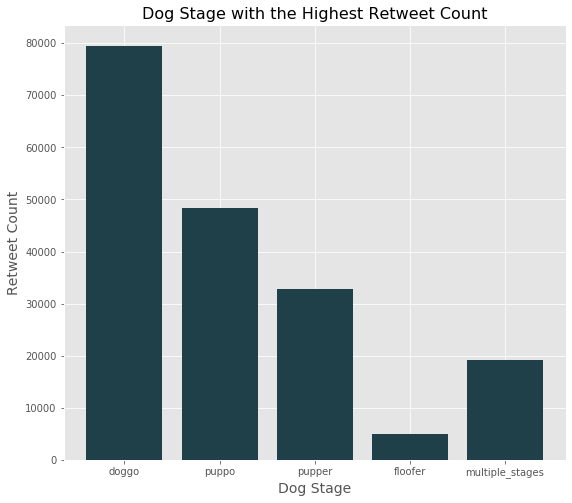

In [144]:
#2 Lets visualize to see the which stage of dog breed has the highest retweet
plt.figure(figsize=(9, 8))
plt.bar(twitter_archive_master['Dog_Stages'], twitter_archive_master['retweet_count'],  color = '#1F3F49')
plt.title('Dog Stage with the Highest Retweet Count', fontsize=16)
plt.xlabel('Dog Stage', fontsize=14)
plt.ylabel('Retweet Count', fontsize=14);

#### Conclusion
* This indicate that the doggo stage of the dog, has the highest retweet count, this is useful as it gives insight to how many retweet had doggo

#### Insight 2: Correlation between the retweet_count and the favorite_count

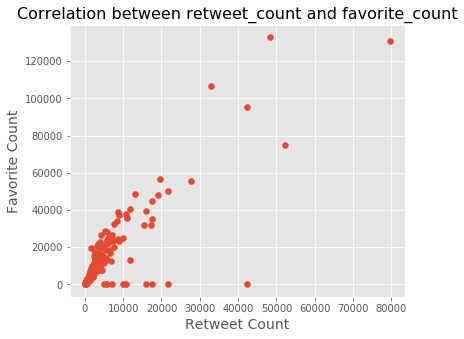

In [145]:
#1. Let's check the relationship between the 'retweet_count' and the 'favorite_count'
plt.figure(figsize=(6, 5))
plt.style.use('ggplot')
plt.scatter(twitter_archive_master['retweet_count'], twitter_archive_master['favorite_count'])
plt.title('Correlation between retweet_count and favorite_count', fontsize=16)
plt.xlabel('Retweet Count', fontsize=14)
plt.ylabel('Favorite Count', fontsize=14);

#### Conclusion
* From the plot above, it can deduced that the higher the Retweet count the higher the number of favorite Count. It indicates a moderately positive correlation between the retweet_count and the favorite_count

#### Insight 3: Dog stage with best Breeds

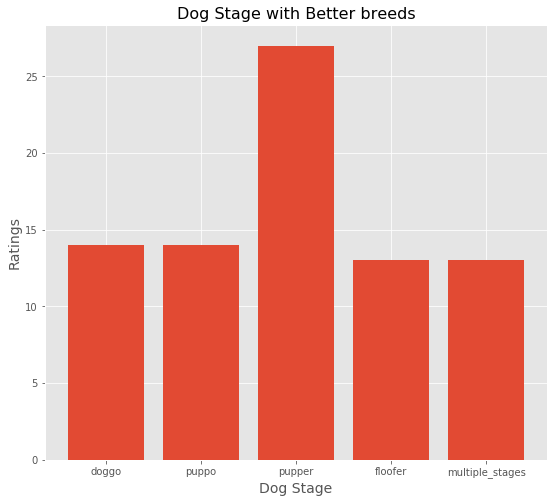

In [146]:
# 3. Let's see which dog stage also have the more better breeds
# fact: The higher the number of numerator rating the better the breed.
plt.figure(figsize=(9, 8))
plt.bar(twitter_archive_master['Dog_Stages'], twitter_archive_master['rating_numerator'])
plt.title('Dog Stage with Better breeds', fontsize=16)
plt.xlabel('Dog Stage', fontsize=14)
plt.ylabel('Ratings', fontsize=14);

#### Conclusion
* Despite doggo having the highest number of retweet, it is needfull we know which stage has more better breed. This indicate that the pupper stage has the highest number of good breeds.

### Further Analysis

* Who made the highest retweet?
* Which source has the highest retweet count?
* Does the confidence prediction have impact on the ratings of the dogs?

# End!!!